In [62]:
import numpy as np
import matplotlib.pyplot as plt
import numba
p=0.5
S=20
s = np.linspace(0, 20, 1000)

In [79]:
@numba.jit(nopython = True, parallel = True)
def sim_one_inventory_path_jitted(initial_x=50.0, sim_length=1000, c = 2):
    
    
    Eπ = np.empty(len(s))
    dvals = np.random.geometric(p, size=sim_length-1) - 1
    for i in range(len(s)):
        X = np.empty(sim_length)
        X[0] = initial_x
        hs = np.empty(sim_length-1)
        π = np.empty(sim_length-1)
        
        
        for t, d in enumerate(dvals):
            x = X[t]
            if x <= s[i]:
                X[t+1] = max(S - d, 0)
                I = 1
            else:
                X[t+1] = max(x - d, 0)
                I = 0
            hs[t] = x + (S - x ) * I
            π[t] = min(hs[t], d) - c * I        
        
        Eπ[i] = np.mean(π)
    return Eπ
    

In [80]:
%%time
ππ = sim_one_inventory_path_jitted()

Wall time: 914 ms


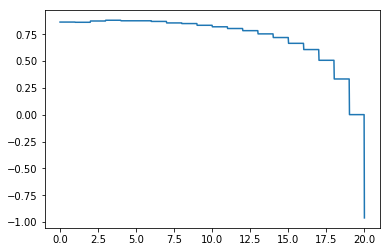

In [81]:
plt.plot(s, ππ)
plt.show()